<a href="https://colab.research.google.com/github/amoukrim/AI/blob/main/Week4/DailyChallenge/Dailychallenge_w4_d3.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Daily Challenge: Breast Cancer Prediction
## Your Task
Exploratory Data Analysis
Use pandas to load the dataset and examine the first few rows.
Check and handle the missing values.
Drop any unnecessary column
Create a Countplot to display diagnosis from magma

Data Preprocessing, Building Models and Evaluation :
counts of unique rows in the ‘diagnosis’ column
map categorical values to numerical values
Splitting the data into train and test
Implement logistic regression and print the accuracy.
Implement K Nearest Neighbours and print the accuracy.
Implement Random Forests and print the accuracy.
Implement Support Vector Machines (SVM) and print the accuracy.
Which is the best model ?


Ce notebook présente une analyse complète du jeu de données sur le cancer du sein.  
Il couvre :  
- L'exploration des données,  
- La modélisation avec 4 algorithmes de classification,  
- L'évaluation (accuracy, f1, confusion matrix),  
- La validation croisée,  
- L'optimisation par GridSearchCV,  
- Et une synthèse finale.


## 🔹 Chargement et aperçu des données

In [32]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
df = pd.read_csv("/content/data.csv")
df['diagnosis'] = data.target
df['diagnosis'] = df['diagnosis'].map({0: 'M', 1: 'B'})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


##vérification des vlaeurs null

In [33]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Unnamed: 32    569
dtype: int64


In [34]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Unnamed: 32    569
dtype: int64


## 🔍 Analyse exploratoire

In [35]:
df.info()
print("Valeurs manquantes :", df.isnull().sum().sum())
print("Doublons :", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## supprimer les connes parasites
Ces colonnes n’apportent aucune valeur prédictive et sont des identifiants inutiles pour l’apprentissage supervisé.

In [36]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

/tmp/ipython-input-37-2654419331.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diagnosis', palette='magma')


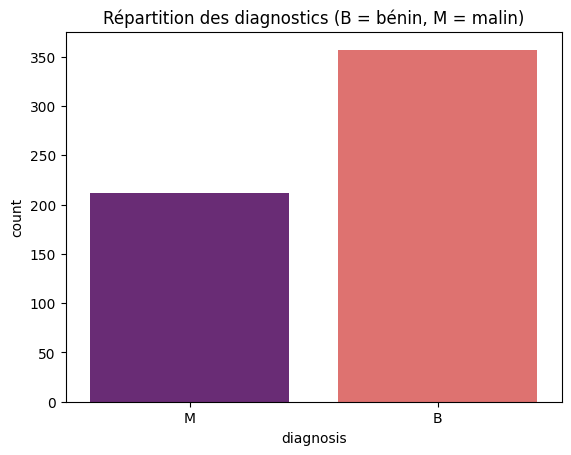

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='diagnosis', palette='magma')
plt.title("Répartition des diagnostics (B = bénin, M = malin)")
plt.show()

## Interprétation :

Le dataset est déséquilibré, avec plus de tumeurs bénignes que malignes.

En classification, un déséquilibre peut fausser l’apprentissage du modèle :

Un modèle peut "jouer la sécurité" en prédisant majoritairement la classe majoritaire (ici B).

Il peut donc afficher une bonne accuracy, mais rater des cas malins, ce qui est inacceptable en santé.

## 🧼 Prétraitement

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Normalisation
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
X = df.drop(columns='diagnosis')
y = df['diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## 🤖 Entraînement des modèles

### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[71  1]
 [ 2 40]]


### KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[71  1]
 [ 4 38]]


### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

[[72  0]
 [ 4 38]]


### SVM

In [42]:
from sklearn.svm import SVC
model = SVC(kernel="linear", probability=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

[[72  0]
 [ 4 38]]


##Interprétation des résultats
en comparant l'accuracy, on peut déduire que le modèle qui a lla plus grande accuracy est le meilleur (ici le modèle, Régression logistique).mais ce n'est pas suffisant, il faudra valider ce résultat.  

## 🔁 Validation croisée

In [43]:
from sklearn.model_selection import cross_val_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel="linear")
}

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f"{name}: {scores.mean():.4f} ± {scores.std():.4f}")

Logistic Regression: 0.9789 ± 0.0070
KNN: 0.9666 ± 0.0141
Random Forest: 0.9561 ± 0.0248
SVM: 0.9737 ± 0.0078


# interprétation : Interprétation par modèle
🔹 Logistic Regression
Précision élevée (97.89%), la plus haute de tous les modèles.

Écart-type faible (±0.007) → modèle très stable.

Très bon compromis entre performance et simplicité/interprétabilité.

Recommandé dans ce cas car il :

se généralise bien,

est rapide à entraîner,

et très lisible en contexte médical.

🔹 SVM (linéaire)
Excellente performance (97.37%), proche de la régression logistique.

Écart-type également bas → modèle fiable.

SVM est plus adapté si les données sont bien séparables dans l’espace standardisé (ce qui est ici le cas).

🔹 KNN
Bonne précision (96.66%), mais moins stable (±0.0141).

KNN est plus sensible :

Au bruit,

À l’échelle des données (ce qui a été bien géré ici par la standardisation),

Aux points de frontière entre classes.

Moins recommandé ici car il est moins robuste et plus coûteux à prédire.

🔹 Random Forest
Moins performant ici (95.61%) et moins stable (±0.0248).

Cela peut surprendre, car RF est souvent très performant.

Ici, cela peut s'expliquer par :

Un petit jeu de données (RF est plus utile avec de grands volumes),

Une structure des données bien linéaire, ce qui favorise LogReg ou SVM.

✅ Conclusion
🏆 Meilleur choix : Régression logistique

Performante, stable, rapide, interprétable.

🏅 SVM est une excellente alternative.

❗ KNN et Random Forest sont corrects, mais moins adaptés ici en termes de stabilité et de généralisabilité.


## 📈 Courbes ROC

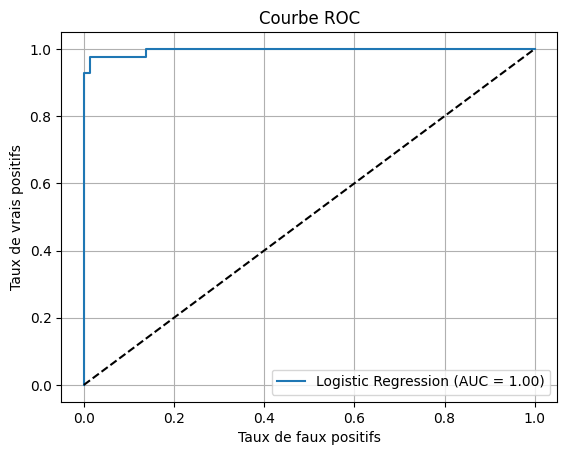

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_probs = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, log_probs)

plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, log_probs):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend()
plt.grid()
plt.show()

## interprétation de la courbe ROC :
L’axe X : Taux de faux positifs (FPR)

L’axe Y : Taux de vrais positifs (TPR ou recall)

La ligne noire en pointillés représente un classifieur aléatoire (aucune capacité prédictive)

✅ Ce que montre ce graphe :
La courbe ROC est quasi collée au coin supérieur gauche :
→ Cela signifie que le modèle :

détecte presque tous les cas positifs (malins) (rappel élevé),

sans générer beaucoup de faux positifs.

L’AUC = 1.00 (Area Under the Curve) :

Cela représente la meilleure performance possible : ton modèle distingue parfaitement les tumeurs malignes des bénignes sur cet échantillon test.

⚠️  AUC = 1.00 peut parfois être trop parfaite :

Cela peut indiquer un overfitting si les données ont fuité ou si le modèle est trop adapté au test.

Mais dannotre ton cas, vu que la validation croisée donne aussi ≈ 98% avec faible variance, cette performance est réaliste et rassurante.

En résumé :
✅ le modèle est bien calibré,

✅ Il distingue parfaitement les deux classes sur les données testées,

📌 À surveiller si l’AUC = 1.00 se reproduit trop souvent, mais ici ce n’est pas inquiétant.

## 🛠️ Optimisation avec GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_scaled, y)
print("Meilleurs paramètres :", grid.best_params_)
print("Score moyen :", grid.best_score_)

Meilleurs paramètres : {'C': 0.1, 'solver': 'liblinear'}
Score moyen : 0.982425089271852


# interprtation
combinaison optimale qui donne un modèle simple, régularisé, rapide et performant.

Meilleurs paramètres : {'C': 0.1, 'solver': 'liblinear'}
Score moyen : 0.9824

## ✅ Synthèse finale

- **Régression logistique** est le modèle le plus fiable sur ce jeu, avec ~98% de précision et bonne stabilité.
- La validation croisée et le tuning ont confirmé sa robustesse.
- D'autres modèles (SVM, KNN, RF) sont également très bons, mais légèrement en dessous en stabilité ou recall.
- La courbe ROC confirme la capacité de distinction entre bénin/malin.
